
The best OTSU Threshold:  [49]


'\ncv2.imwrite("..\\RXX-2020-CVA\\Testing dataset\\TianJing-SPOT/subtrcat.bmp",thread1)\ncv2.imwrite("..\\RXX-2020-CVA\\Testing dataset\\TianJing-SPOT/divide.bmp",thread2)\ncv2.imwrite("..\\RXX-2020-CVA\\Testing dataset\\TianJing-SPOT/cva.bmp",thread3)\n'

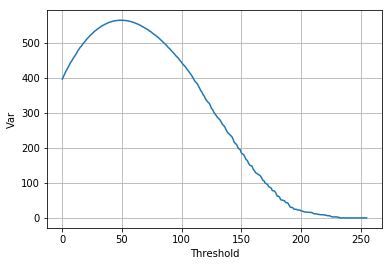

In [38]:
#实现滤波v使用卷积核进行滤波（特征的提取）
import matplotlib.pyplot as plt
import pylab
import numpy as np
import cv2


from test2 import divede,cva,divede
import numpy as np


def CD_diff(img1,img2):#影像差值法
    delta=cv2.subtract(img1,img2)
    #delta=np.abs(delta)
    #delta.min()
    sh=delta.shape
    th=Find_Threshold(delta)
    # 设为灰度值 再进行运算
    delta = cv2.cvtColor(delta, cv2.COLOR_BGR2GRAY)
    
    #print(delta.min())
    if np.size(th)>1:
        th=th[0]
    for i1 in range(sh[0]):
        for i2 in range(sh[1]):
            if delta[i1][i2]<=th:
                delta[i1][i2]=0
            else:
                delta[i1][i2]=255
    return delta

def Find_Threshold(delta):#OTSU寻找阈值
    # 求灰度方差最大的那个数
    #主要是利用方差来进行计算

    val=np.zeros([256])
    for th in range(256):
        loc1=delta>th
        # loc1 为true 或false 的矩阵
        loc2=delta<=th
        '''delta[loc1]=255
        delta[loc2]=0'''
        #delta[loc1] 将为True 的矩阵元素提取出来为1维
        if delta[loc1].size==0:
            mu1=0
            omega1=0
        else:
            mu1=np.mean(delta[loc1])
            #平均值
            omega1=delta[loc1].size/delta.size
            # 所占比例
        if delta[loc2].size==0:
            mu2=0
            omega2=0
        else:
            mu2=np.mean(delta[loc2])
            omega2=delta[loc2].size/delta.size
        
        #最终推导的公式为  g=w0*w1*()
        # 这里使用了最后的推导公式原文地址https://blog.csdn.net/guoyk1990/article/details/7606032?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase
        val[th]=omega1*omega2*np.power((mu1-mu2),2)

    #print("val=",val.shape)
    plt.figure()
    # val 存放的是类间方差 取其最大
    loc=np.where(val==np.max(val))
    #x=np.arange(0,256,1)
    #x=x.reshape([1,256])
    plt.plot(val)
    plt.ylabel("Var")
    plt.xlabel("Threshold")
    plt.grid("on")

    print("\nThe best OTSU Threshold: ",loc[0])
    return loc[0]

def evevalue_it(img1,img2):
    # img1 the true picture
    #img2 the detected pictrue
    # 图像检测评价   x00 表示变化
    #两个算法通过对比白色表示变化部分
    #不一定黑色就是变化部分  0 表示黑色 255 表示白色

    x00=0
    x10=0
    x01=0
    x11=0
    (row,cloumn)=img1.shape
    for i in range(row):
        for j in range(cloumn):
            if img1[i][j]==255 and img2[i][j]==255:
                x00+=1 # X00表示两个都变化
            if img1[i][j]== 0 and img2[i][j]==0:
                x11+=1 #x11 表示两个都没变化
            if img1[i][j]==0 and img2[i][j]==255:
                x10+=1   # x10 表示检测出没变化 但实际变化了
            if img1[i][j]==255 and img2[i][j]==0:
                x01+=1  #检测出变化了，但实际没变化
    
    print(x00,x11,x10,x01)
    TRC=x00+x10
    #TRC 表示实际变化的
    TRU=x01+x11
    #TRU 表示实际没变化
    TDC=x00+x01
    print(TDC)
    # 
    TDU=x10+x11
    T=row*cloumn
    #总错误率
    
    total_erro=(x01+x10)/T
    # 误检率
    fake_erro=x01/TRU
    #漏检率
    dn_find_erro=x10/TRC
    #整体精度
    total_accucy=(x00+x11)/T
    print("总错误率为%f" %total_erro+"误检率%f" %fake_erro+"漏检率为%f" %dn_find_erro,"整体精度为%f" %total_accucy,sep=";")
    
    
    
    
img1=cv2.imread(r'C:\Users\dell\Desktop\RXX-2020-CVA\RXX-2020-CVA\Testing dataset\TianJing-SPOT\substract.bmp')
#img2=cv2.imread(r'C:\Users\dell\Desktop\RXX-2020-CVA\RXX-2020-CVA\Testing dataset\B-landslideAerialImage\2014dopdyssubB_CopyRaster.tif')
img3=plt.imread(r'C:\Users\dell\Desktop\RXX-2020-CVA\RXX-2020-CVA\Testing dataset\TianJing-SPOT\GT9.tif')
img1 =cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#img3 =cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
'''
plt.imshow(img1)
pylab.show()
#显示读取的图片
plt.imshow(img2)
pylab.show()


diff=cva(img1,img2)
img1 =cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
'''

# 进行算法的评价
evevalue_it(img1,img3)
#plt.imshow(diff)    #显示卷积后的图片

'''
pylab.show()

cv2.imshow('diff',diff)

cv2.waitKey(0)
cv2.destroyAllWindows()
'''

'''
cv2.imwrite("..\RXX-2020-CVA\Testing dataset\TianJing-SPOT/subtrcat.bmp",thread1)
cv2.imwrite("..\RXX-2020-CVA\Testing dataset\TianJing-SPOT/divide.bmp",thread2)
cv2.imwrite("..\RXX-2020-CVA\Testing dataset\TianJing-SPOT/cva.bmp",thread3)
'''
